# Illustration of Uniform Quantization

This code is provided as supplementary material of the lecture Quellencodierung.

This code illustrates
* Uniform scalar quantization with midrise characteristic

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

Generate artificial signal
$$
x[k] = \sin\left(2\pi\frac{2k}{f_s}\right),\qquad k = 0,\ldots,f_s
$$

In [2]:
sr = 22050 # sample rate
T = 1.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = np.sin(2*np.pi*2*t)                # pure sine wave at 2 Hz

Uniform Quantization

In [3]:
# Sample to 4 bit ... 16 quantization levels
w = 4

# fix x_max based on the current signal, leave some tiny room
x_max = np.max(x) + 1e-10
Delta_x = x_max / (2**(w-1))

xh_max = (2**w-1)*Delta_x/2

# Quantize
xh_uniform_midrise = np.sign(x)*Delta_x*(np.floor(np.abs(x)/Delta_x)+0.5) 

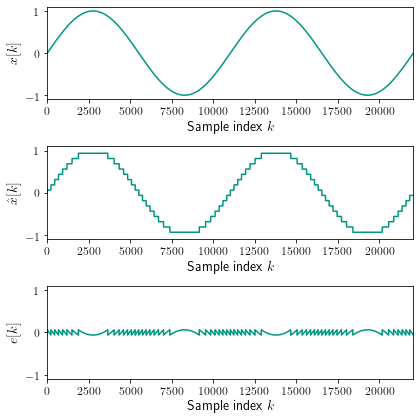

In [8]:
font = {'size'   : 12}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.figure(figsize=(6, 6))
plt.subplot(3,1,1)
plt.plot(range(len(t)),x, c=(0,0.59,0.51))
plt.autoscale(enable=True, axis='x', tight=True)
#plt.title('Original')
plt.xlabel('Sample index $k$', fontsize=14)
plt.ylabel('$x[k]$', fontsize=14)
plt.ylim((-1.1,+1.1))

plt.subplot(3,1,2)
plt.plot(range(len(t)),xh_uniform_midrise, c=(0,0.59,0.51))
plt.autoscale(enable=True, axis='x', tight=True)
#plt.title('Quantized')
plt.xlabel('Sample index $k$', fontsize=14)
plt.ylabel('$\hat{x}[k]$', fontsize=14)
plt.ylim((-1.1,+1.1))

plt.subplot(3,1,3)
plt.plot(range(len(t)),xh_uniform_midrise-x,c=(0,0.59,0.51))
plt.autoscale(enable=True, axis='x', tight=True)
#plt.title('Quantization error signal')
plt.xlabel('Sample index $k$', fontsize=14)
plt.ylabel('$e[k]$', fontsize=14)
plt.ylim((-1.1,+1.1))

plt.tight_layout()
#plt.savefig('figure_DST_7.2c.pdf',bbox_inches='tight')